## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=1024, activation="relu")(input_layer)
    x = keras.layers.Dense(units=512, activation="relu")(x)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 3,837,066
Trainable params: 3,837,066
Non-trainable params: 0
_________________________________________________

In [6]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 17s 345us/step - loss: 2.0739 - accuracy: 0.2612 - val_loss: 2.0367 - val_accuracy: 0.2754
Epoch 2/500
50000/50000 [==============================] - 17s 336us/step - loss: 1.8915 - accuracy: 0.3305 - val_loss: 1.9669 - val_accuracy: 0.2994
Epoch 3/500
50000/50000 [==============================] - 17s 337us/step - loss: 1.8233 - accuracy: 0.3563 - val_loss: 1.8087 - val_accuracy: 0.3435
Epoch 4/500
50000/50000 [==============================] - 17s 347us/step - loss: 1.7739 - accuracy: 0.3754 - val_loss: 1.7464 - val_accuracy: 0.3943
Epoch 5/500
50000/50000 [==============================] - 17s 339us/step - loss: 1.7346 - accuracy: 0.3922 - val_loss: 1.7482 - val_accuracy: 0.3898
Epoch 6/500
50000/50000 [==============================] - 17s 341us/step - loss: 1.7011 - accuracy: 0.4003 - val_loss: 1.7201 - val_accuracy: 0.3896
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 18s 354us/step - loss: 1.0971 - accuracy: 0.6160 - val_loss: 1.4644 - val_accuracy: 0.4851
Epoch 56/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.0849 - accuracy: 0.6193 - val_loss: 1.3212 - val_accuracy: 0.5293
Epoch 57/500
50000/50000 [==============================] - 21s 423us/step - loss: 1.0819 - accuracy: 0.6199 - val_loss: 1.3476 - val_accuracy: 0.5194
Epoch 58/500
50000/50000 [==============================] - 20s 406us/step - loss: 1.0684 - accuracy: 0.6266 - val_loss: 1.4660 - val_accuracy: 0.4774
Epoch 59/500
50000/50000 [==============================] - 17s 336us/step - loss: 1.0694 - accuracy: 0.6258 - val_loss: 1.4770 - val_accuracy: 0.4954
Epoch 60/500
50000/50000 [==============================] - 17s 334us/step - loss: 1.0512 - accuracy: 0.6341 - val_loss: 1.4297 - val_accuracy: 0.4931
Epoch 61/500
50000/50000 [==============================] - 16s 328us/step - loss: 1.0384 - ac

50000/50000 [==============================] - 18s 359us/step - loss: 0.6135 - accuracy: 0.7925 - val_loss: 1.5199 - val_accuracy: 0.5252
Epoch 110/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.6135 - accuracy: 0.7917 - val_loss: 1.4771 - val_accuracy: 0.5352
Epoch 111/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.5936 - accuracy: 0.7980 - val_loss: 1.5670 - val_accuracy: 0.5210
Epoch 112/500
50000/50000 [==============================] - 16s 328us/step - loss: 0.5735 - accuracy: 0.8068 - val_loss: 1.6758 - val_accuracy: 0.5190
Epoch 113/500
50000/50000 [==============================] - 16s 327us/step - loss: 0.5736 - accuracy: 0.8077 - val_loss: 1.5512 - val_accuracy: 0.5357
Epoch 114/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.5600 - accuracy: 0.8105 - val_loss: 1.5660 - val_accuracy: 0.5339
Epoch 115/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.5406 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 16s 329us/step - loss: 0.1645 - accuracy: 0.9542 - val_loss: 2.3823 - val_accuracy: 0.4860
Epoch 164/500
50000/50000 [==============================] - 16s 326us/step - loss: 0.2116 - accuracy: 0.9428 - val_loss: 2.1358 - val_accuracy: 0.5396
Epoch 165/500
50000/50000 [==============================] - 18s 361us/step - loss: 0.2471 - accuracy: 0.9358 - val_loss: 2.0426 - val_accuracy: 0.5414
Epoch 166/500
50000/50000 [==============================] - 16s 324us/step - loss: 0.2263 - accuracy: 0.9412 - val_loss: 1.9802 - val_accuracy: 0.5481
Epoch 167/500
50000/50000 [==============================] - 16s 317us/step - loss: 0.2571 - accuracy: 0.9339 - val_loss: 2.2019 - val_accuracy: 0.5229
Epoch 168/500
50000/50000 [==============================] - 16s 319us/step - loss: 0.1421 - accuracy: 0.9646 - val_loss: 1.9816 - val_accuracy: 0.5475
Epoch 169/500
50000/50000 [==============================] - 16s 321us/step - loss: 0.15

Epoch 217/500
50000/50000 [==============================] - 16s 318us/step - loss: 0.0140 - accuracy: 0.9995 - val_loss: 2.6122 - val_accuracy: 0.5461
Epoch 218/500
50000/50000 [==============================] - 16s 318us/step - loss: 0.0133 - accuracy: 0.9996 - val_loss: 2.5790 - val_accuracy: 0.5538
Epoch 219/500
50000/50000 [==============================] - 16s 320us/step - loss: 0.0126 - accuracy: 0.9997 - val_loss: 2.5900 - val_accuracy: 0.5546
Epoch 220/500
50000/50000 [==============================] - 16s 317us/step - loss: 0.0124 - accuracy: 0.9996 - val_loss: 2.6033 - val_accuracy: 0.5530
Epoch 221/500
50000/50000 [==============================] - 16s 318us/step - loss: 0.0118 - accuracy: 0.9996 - val_loss: 2.6043 - val_accuracy: 0.5550
Epoch 222/500
50000/50000 [==============================] - 16s 317us/step - loss: 0.0116 - accuracy: 0.9997 - val_loss: 2.6414 - val_accuracy: 0.5533
Epoch 223/500
50000/50000 [==============================] - 16s 321us/step - loss: 0.01

Epoch 271/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 2.8115 - val_accuracy: 0.5549
Epoch 272/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 2.8139 - val_accuracy: 0.5559
Epoch 273/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 2.8165 - val_accuracy: 0.5554
Epoch 274/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0052 - accuracy: 0.9999 - val_loss: 2.8117 - val_accuracy: 0.5561
Epoch 275/500
50000/50000 [==============================] - 17s 339us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 2.8245 - val_accuracy: 0.5563
Epoch 276/500
50000/50000 [==============================] - 17s 339us/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.8361 - val_accuracy: 0.5573
Epoch 277/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.00

50000/50000 [==============================] - 17s 340us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 3.0580 - val_accuracy: 0.5546
Epoch 325/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 3.0673 - val_accuracy: 0.5569
Epoch 326/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.0649 - val_accuracy: 0.5558
Epoch 327/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.0715 - val_accuracy: 0.5549
Epoch 328/500
50000/50000 [==============================] - 17s 338us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.0772 - val_accuracy: 0.5556
Epoch 329/500
50000/50000 [==============================] - 17s 342us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.0734 - val_accuracy: 0.5558
Epoch 330/500
50000/50000 [==============================] - 17s 339us/step - loss: 0.0023 - accuracy:

Epoch 378/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.2145 - val_accuracy: 0.5561
Epoch 379/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.2134 - val_accuracy: 0.5557
Epoch 380/500
50000/50000 [==============================] - 17s 336us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.2168 - val_accuracy: 0.5557
Epoch 381/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.2214 - val_accuracy: 0.5564
Epoch 382/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.2226 - val_accuracy: 0.5562
Epoch 383/500
50000/50000 [==============================] - 17s 336us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.2270 - val_accuracy: 0.5543
Epoch 384/500
50000/50000 [==============================] - 18s 360us/step - loss: 0.00

Epoch 432/500
50000/50000 [==============================] - 17s 337us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.3232 - val_accuracy: 0.5543
Epoch 433/500
50000/50000 [==============================] - 17s 339us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.3264 - val_accuracy: 0.5547
Epoch 434/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.3310 - val_accuracy: 0.5557
Epoch 435/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.3312 - val_accuracy: 0.5549
Epoch 436/500
50000/50000 [==============================] - 17s 336us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.3319 - val_accuracy: 0.5549
Epoch 437/500
50000/50000 [==============================] - 17s 344us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.3350 - val_accuracy: 0.5565
Epoch 438/500
50000/50000 [==============================] - 17s 339us/step - loss: 0.00

50000/50000 [==============================] - 17s 348us/step - loss: 8.7494e-04 - accuracy: 1.0000 - val_loss: 3.4159 - val_accuracy: 0.5545
Epoch 486/500
50000/50000 [==============================] - 18s 361us/step - loss: 8.6958e-04 - accuracy: 1.0000 - val_loss: 3.4169 - val_accuracy: 0.5556
Epoch 487/500
50000/50000 [==============================] - 18s 365us/step - loss: 8.6701e-04 - accuracy: 1.0000 - val_loss: 3.4173 - val_accuracy: 0.5550
Epoch 488/500
50000/50000 [==============================] - 19s 383us/step - loss: 8.6437e-04 - accuracy: 1.0000 - val_loss: 3.4207 - val_accuracy: 0.5549
Epoch 489/500
50000/50000 [==============================] - 17s 340us/step - loss: 8.5932e-04 - accuracy: 1.0000 - val_loss: 3.4215 - val_accuracy: 0.5549
Epoch 490/500
50000/50000 [==============================] - 17s 339us/step - loss: 8.5753e-04 - accuracy: 1.0000 - val_loss: 3.4210 - val_accuracy: 0.5556
Epoch 491/500
50000/50000 [==============================] - 17s 337us/step - 

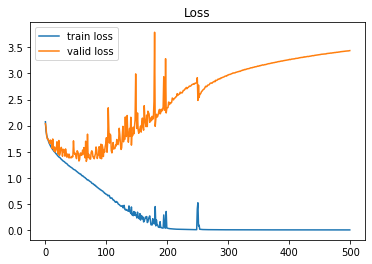

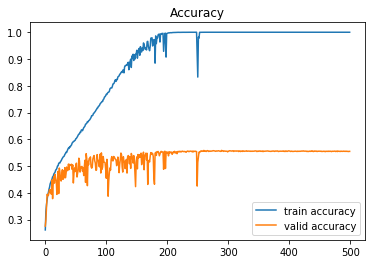

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()